# Import Libraries

In [1]:
import pandas as pd
import numpy as np

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import KMeansSMOTE, SMOTE

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from pydotplus import graph_from_dot_data
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, auc, precision_recall_curve, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, PrecisionRecallDisplay

# Visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline
sns.set_style('darkgrid')
random_state = 42

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

<Axes: xlabel='Attrition', ylabel='count'>

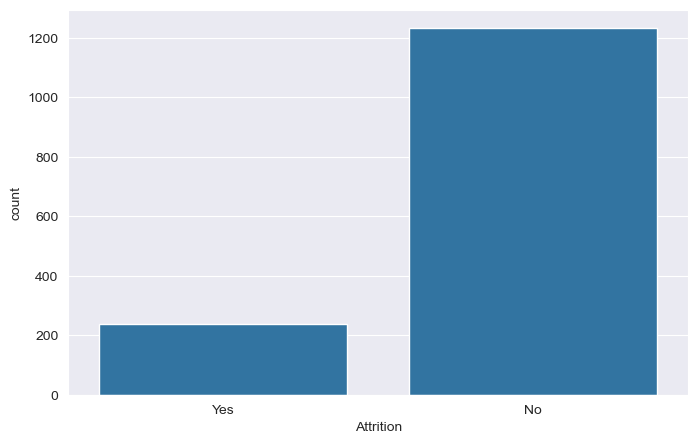

In [5]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['Attrition'], data=df)

In [6]:
df['PerformanceRating'].unique()

array([3, 4], dtype=int64)

<Axes: xlabel='PerformanceRating', ylabel='count'>

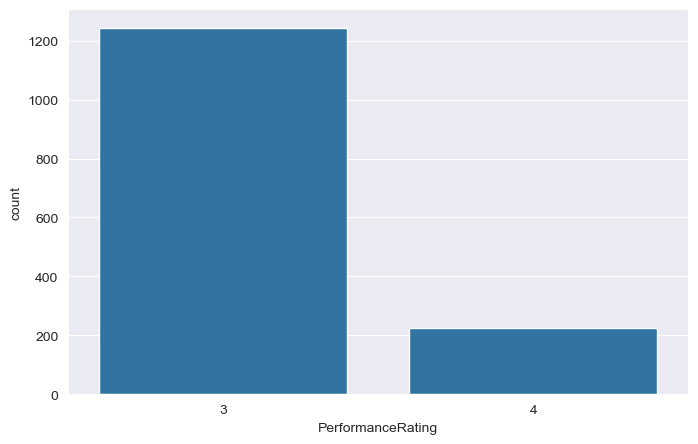

In [7]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['PerformanceRating'], data=df)

In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1470.0,NaN,NaN,NaN,36.92381,9.135373,18.0,30.0,36.0,43.0,60.0
Attrition,1470,2,No,1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravel,1470,3,Travel_Rarely,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,1470.0,NaN,NaN,NaN,802.485714,403.5091,102.0,465.0,802.0,1157.0,1499.0
Department,1470,3,Research & Development,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1470.0,NaN,NaN,NaN,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,NaN,NaN,NaN,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EducationField,1470,6,Life Sciences,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,1470.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,1470.0,NaN,NaN,NaN,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0


# Exploratory Data Analysis

## 2.2 Data Cleaning

### 2.2.1 Drop Duplicate

In [9]:
df = df.drop_duplicates()

In [10]:
df['MaritalStatus'].value_counts().sort_index()

MaritalStatus
Divorced    327
Married     673
Single      470
Name: count, dtype: int64

## 2.2 Data Exploration

### 2.2.1 Target Class Distribution

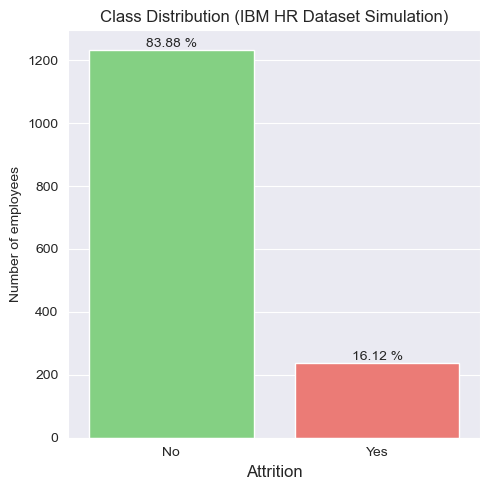

In [11]:
plt.figure(figsize = (5,5))
graph_target = sns.countplot(x="Attrition", data=df, palette=['#77DD76','#FF6962'], order=df['Attrition'].value_counts().index)

i=0
for p in graph_target.patches:
    height = p.get_height()
    
    percentage = round(100 * df["Attrition"].value_counts().iloc[i] / len(df),2)
    
    str_plot = f'{percentage} %'

    graph_target.text(p.get_x()+p.get_width()/2., height + 10, str_plot, ha="center")
    i += 1

plt.title('Class Distribution (IBM HR Dataset Simulation)')
plt.xticks([0,1])
plt.xlabel('Attrition', fontsize=12)
plt.ylabel('Number of employees')
plt.tight_layout()

### 2.2.2 Numerical Features

In [12]:
def NumericalVariables_targetPlots(df,segment_by,target_var = "Attrition"):
    
    fig, ax = plt.subplots(ncols= 2, figsize = (14,6))    

    sns.boxplot(x = target_var, y = segment_by, data=df, ax=ax[0])
    ax[0].set_title("Comparision of " + segment_by + " vs " + target_var)
    
    ax[1].set_title("Distribution of "+segment_by)
    ax[1].set_ylabel("Frequency")
    sns.distplot(a = df[segment_by], ax=ax[1], kde=False)
    
    plt.show()

#### Age

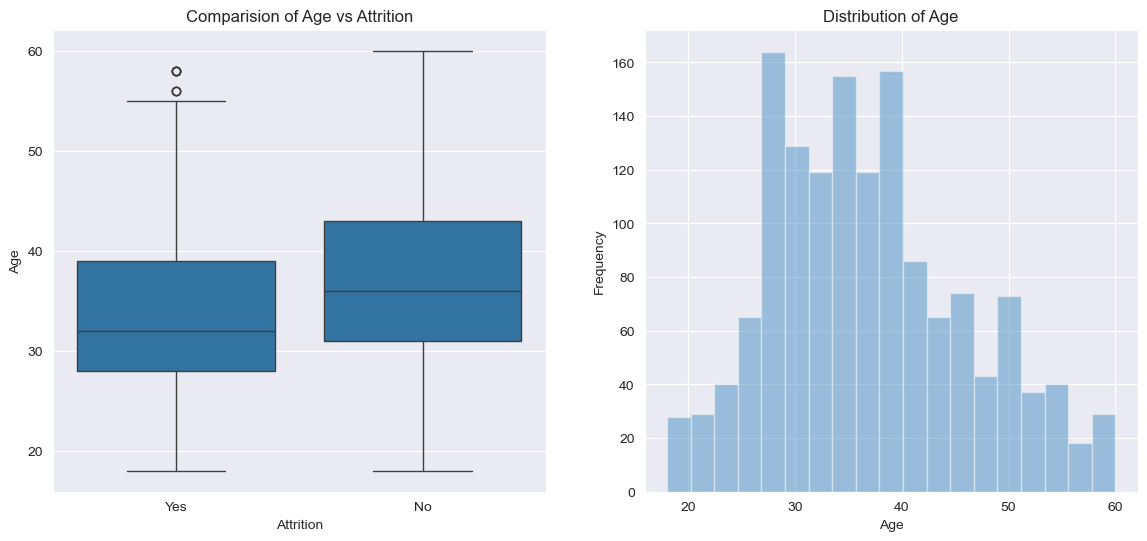

In [13]:
NumericalVariables_targetPlots(df,segment_by="Age")

Orang yang tidak meninggalkan perusahaan berada di atas usia 30 tahun

#### Daily Rate & Montly Income & HourlyRate

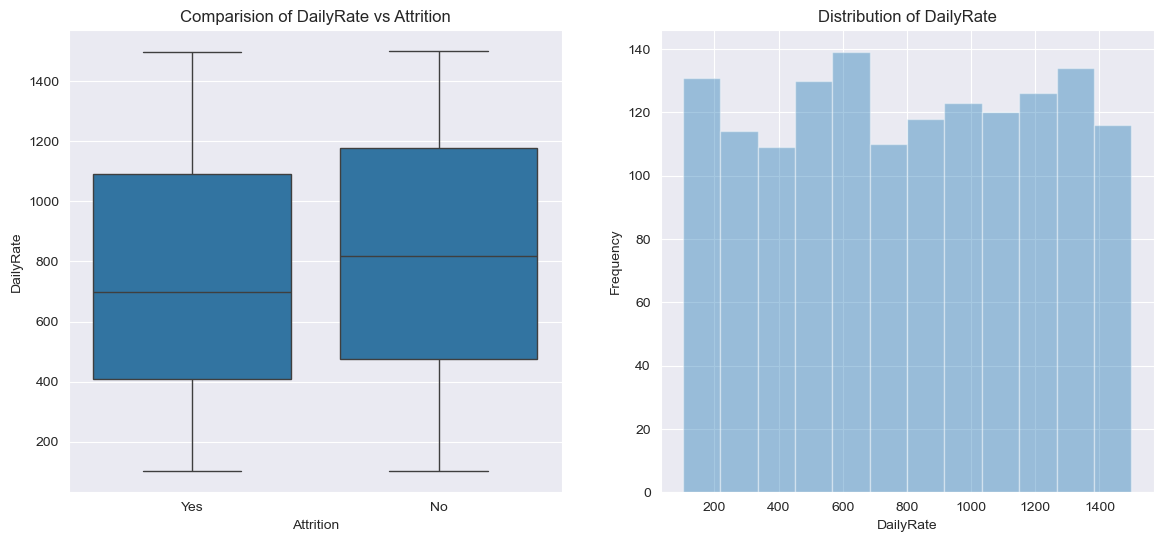

In [14]:
NumericalVariables_targetPlots(df,"DailyRate")

Employee dengan tingkat daily rates rendah rentan untuk meninggalkan perusahaan

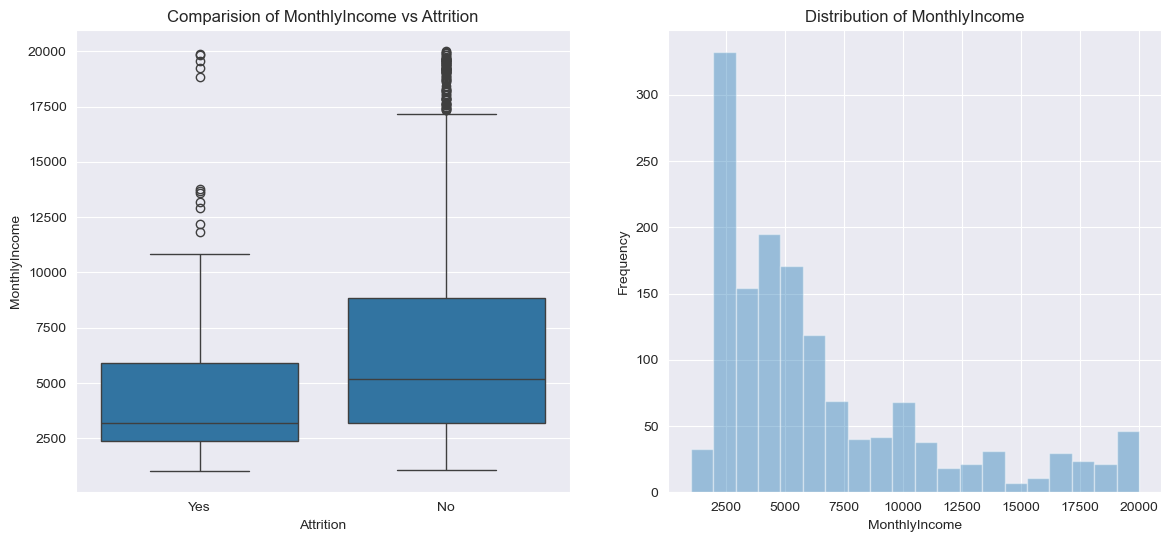

In [15]:
NumericalVariables_targetPlots(df,"MonthlyIncome")

Semakin rendah income per bulan, semakin besar kemungkinan employee untuk meninggalkan perusahaan

#### Hourly Rate

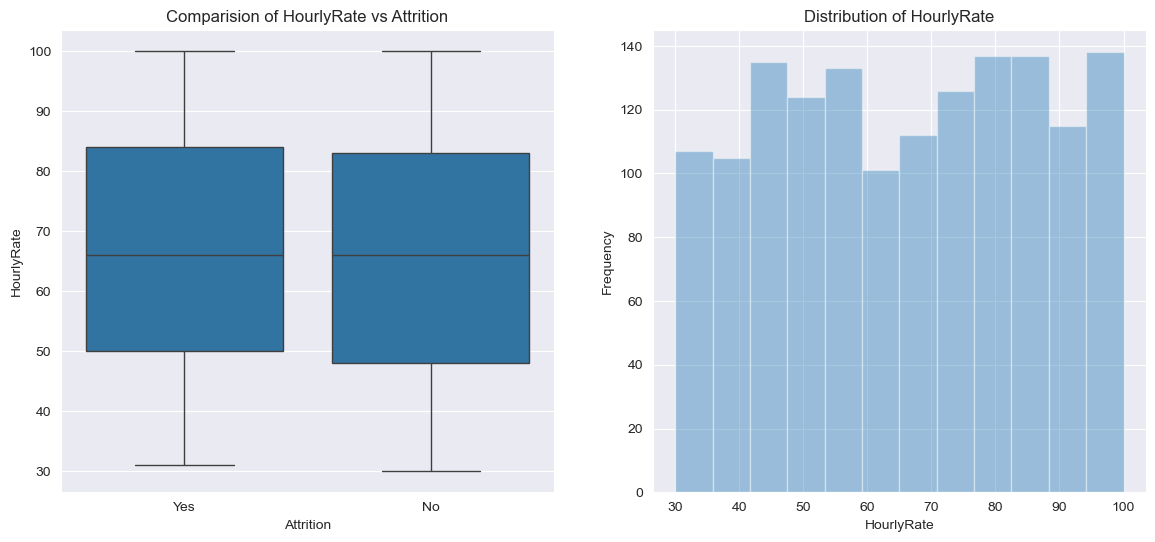

In [16]:
NumericalVariables_targetPlots(df,"HourlyRate")

Tidak terlalu signifikan. Namun, employee dengna hourly rate tinggi rawan meninggalkan perusahaan

#### Percent Salary Hike

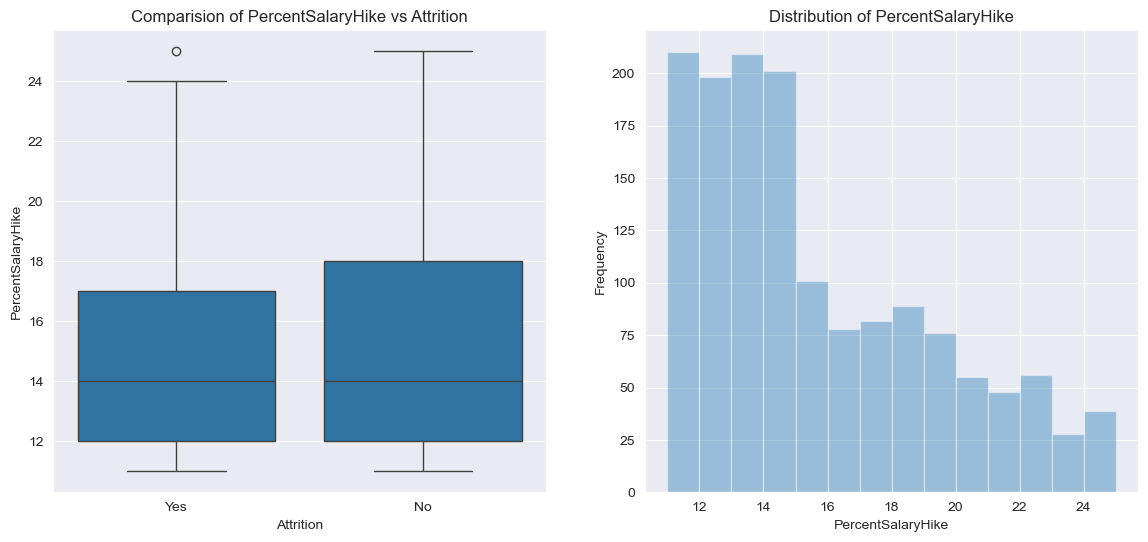

In [17]:
NumericalVariables_targetPlots(df,"PercentSalaryHike")

#### Total Working Years

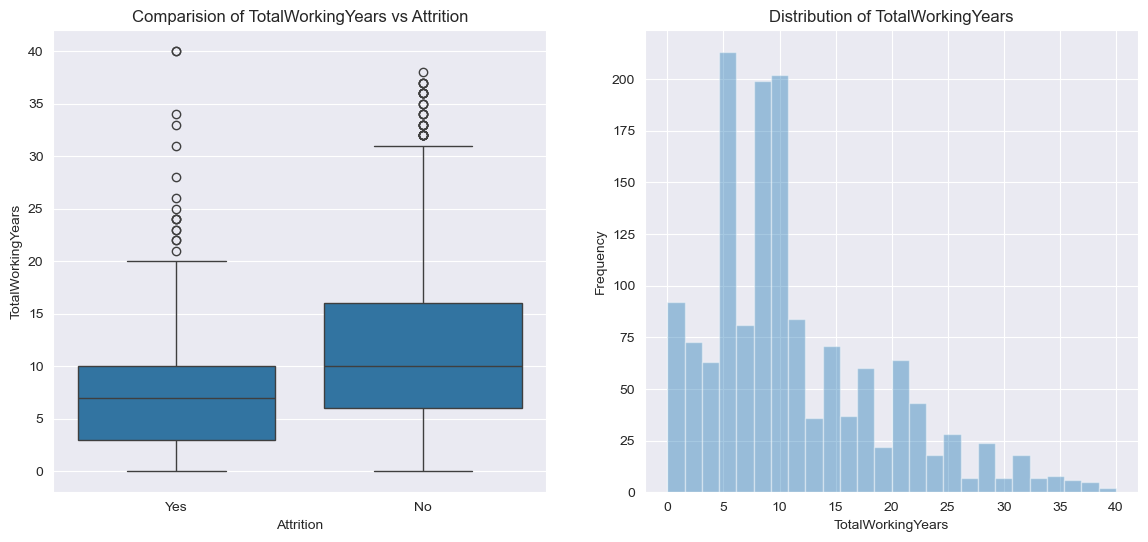

In [18]:
NumericalVariables_targetPlots(df,"TotalWorkingYears")

Dari sini, semakin lama employee bekerja, kemungkinan untuk meninggalkan perusahaan semakin kecil. Apakah ini indikasi terjebak di zona nyaman?

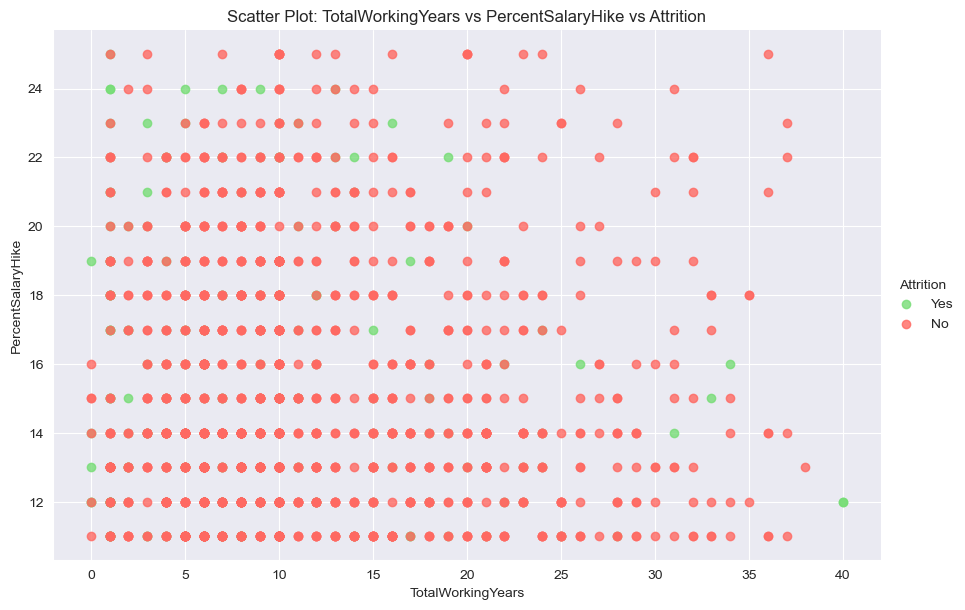

In [19]:
sns.lmplot(x="TotalWorkingYears", y="PercentSalaryHike", data=df, 
           fit_reg=False, 
           hue="Attrition", 
           height=6,
           aspect=1.5, 
           palette=['#77DD76','#FF6962']) 

plt.title("Scatter Plot: TotalWorkingYears vs PercentSalaryHike vs Attrition")
plt.show()

### 2.2.3 Categorical Features

In [20]:
df['Attrition_Numeric'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

print(df[['Attrition', 'Attrition_Numeric']].head())

  Attrition  Attrition_Numeric
0       Yes                  1
1        No                  0
2       Yes                  1
3        No                  0
4        No                  0


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

def CategoricalVariables_targetPlots(df, segment_by, invert_axis=False):
    
    fig, ax = plt.subplots(ncols=2, figsize=(14, 6))
    
    if invert_axis == False:
        sns.countplot(x=segment_by, data=df, hue="Attrition", ax=ax[0], palette=['#77DD76','#FF6962'])
    else:
        sns.countplot(y=segment_by, data=df, hue="Attrition", ax=ax[0], palette=['#77DD76','#FF6962'])
        
    ax[0].set_title(f"Comparison of {segment_by} vs Attrition")
    
    if invert_axis == False:
        sns.barplot(x=segment_by, y="Attrition_Numeric", data=df, ci=None, ax=ax[1])
    else:
        sns.barplot(y=segment_by, x="Attrition_Numeric", data=df, ci=None, ax=ax[1])
        
    ax[1].set_title(f"Attrition Rate by {segment_by}")
    ax[1].set_ylabel("Attrition Probability (0.0 - 1.0)")
    
    plt.tight_layout()
    plt.show()

#### Job Involvement

In [22]:
pd.crosstab(df.JobInvolvement,df.Attrition)

Attrition,No,Yes
JobInvolvement,,
1,55,28
2,304,71
3,743,125
4,131,13


In [23]:
round(df.JobInvolvement.value_counts()/df.shape[0] * 100,2)

JobInvolvement
3    59.05
2    25.51
4     9.80
1     5.65
Name: count, dtype: float64

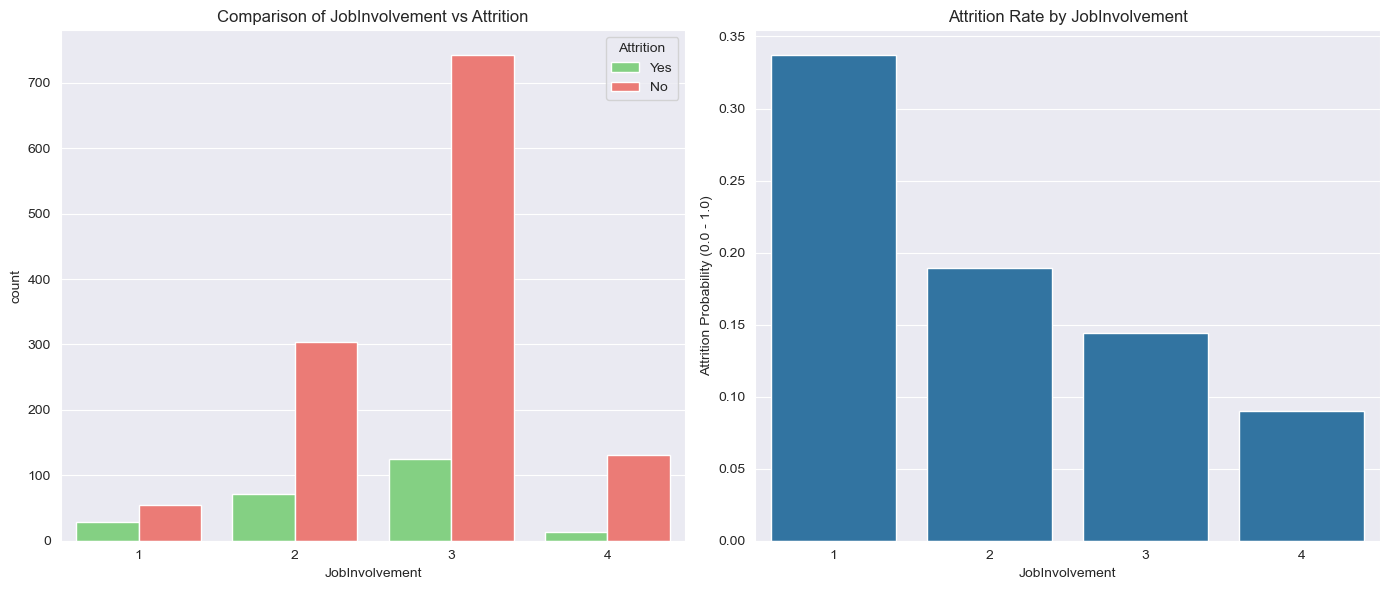

In [24]:
CategoricalVariables_targetPlots(df,"JobInvolvement")

#### Job Satisfaction

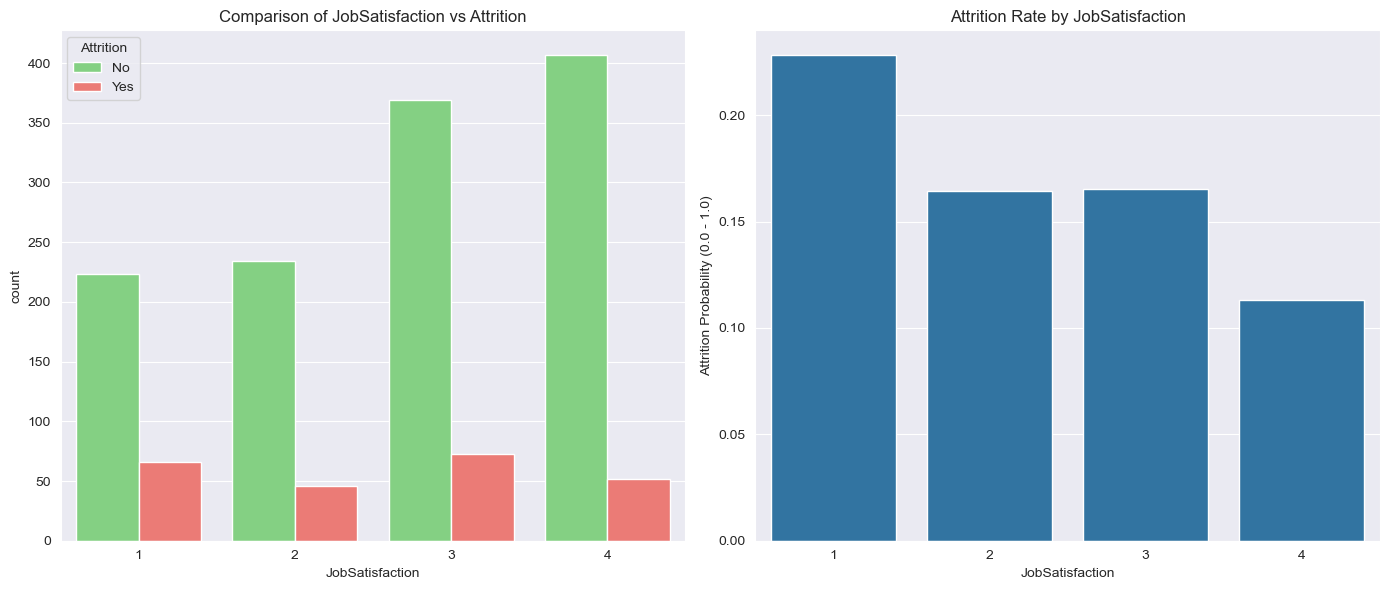

In [25]:
CategoricalVariables_targetPlots(df,"JobSatisfaction")

#### Performance Rating

In [26]:
df.PerformanceRating.value_counts()

PerformanceRating
3    1244
4     226
Name: count, dtype: int64

In [27]:
round(df.PerformanceRating.value_counts()/df.shape[0] * 100,2)

PerformanceRating
3    84.63
4    15.37
Name: count, dtype: float64

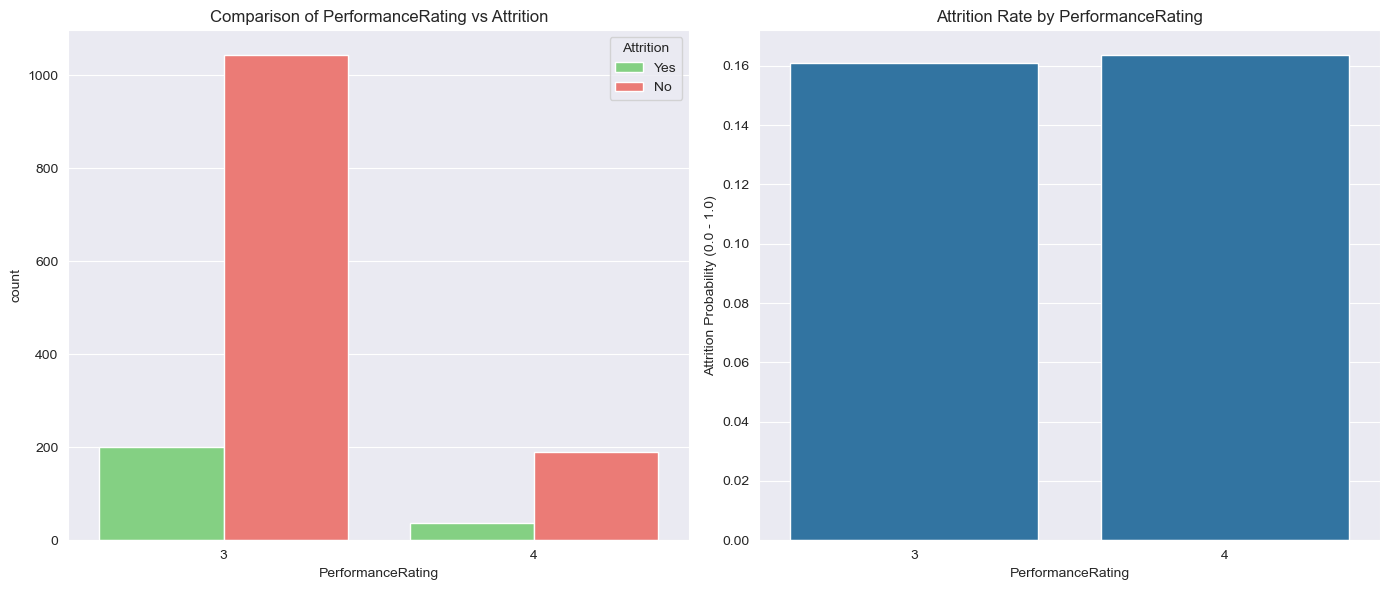

In [28]:
CategoricalVariables_targetPlots(df,"PerformanceRating")

#### Relationship Satisfaction

In [29]:
round(df.RelationshipSatisfaction.value_counts()/df.shape[0],2)

RelationshipSatisfaction
3    0.31
4    0.29
2    0.21
1    0.19
Name: count, dtype: float64

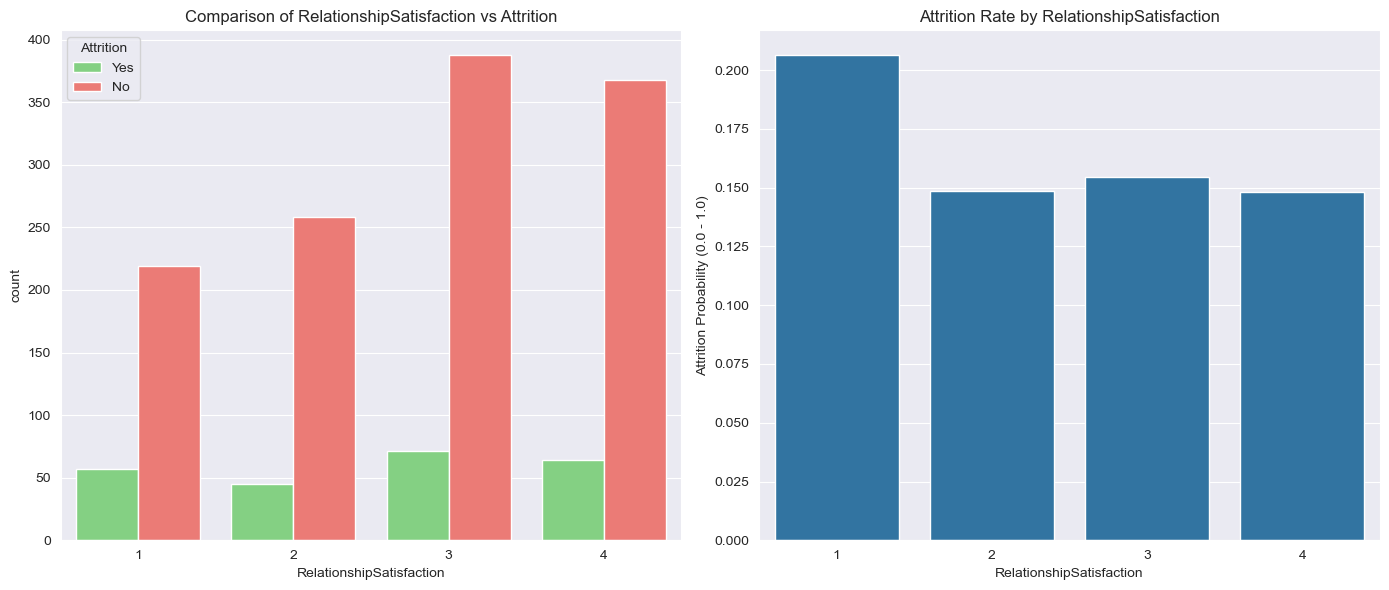

In [30]:
CategoricalVariables_targetPlots(df,"RelationshipSatisfaction")

#### WorkLife Balance

In [31]:
round(df.WorkLifeBalance.value_counts()/df.shape[0],2)

WorkLifeBalance
3    0.61
2    0.23
4    0.10
1    0.05
Name: count, dtype: float64

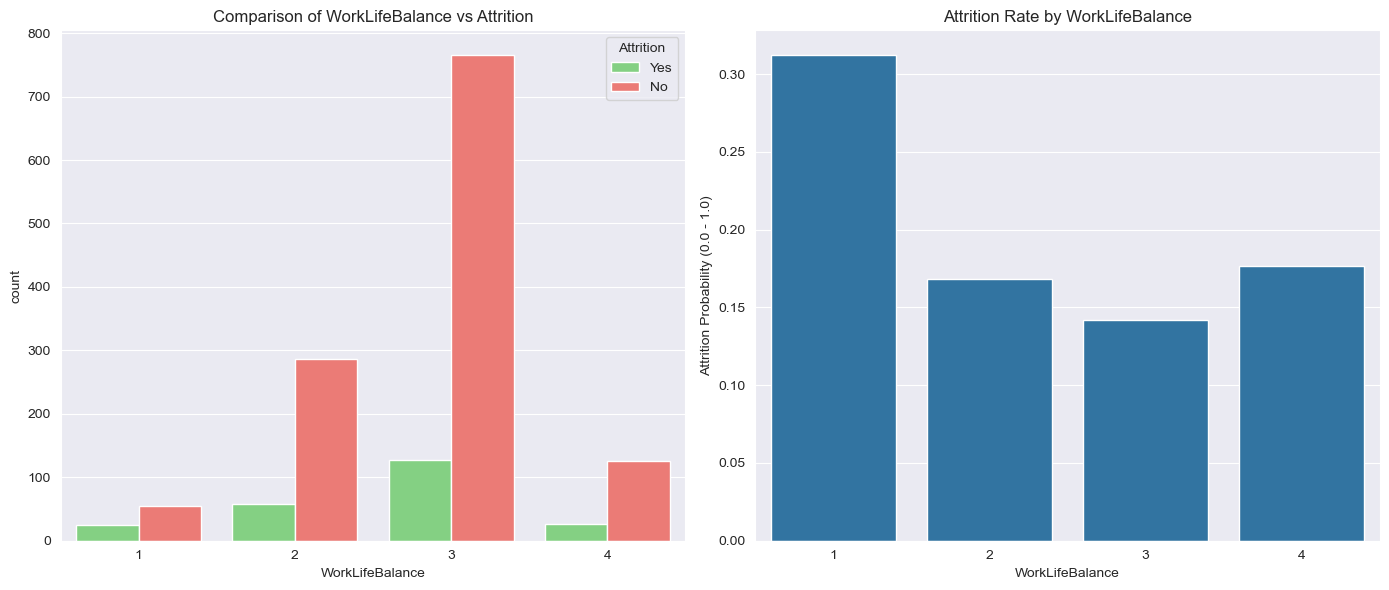

In [32]:
CategoricalVariables_targetPlots(df,"WorkLifeBalance")

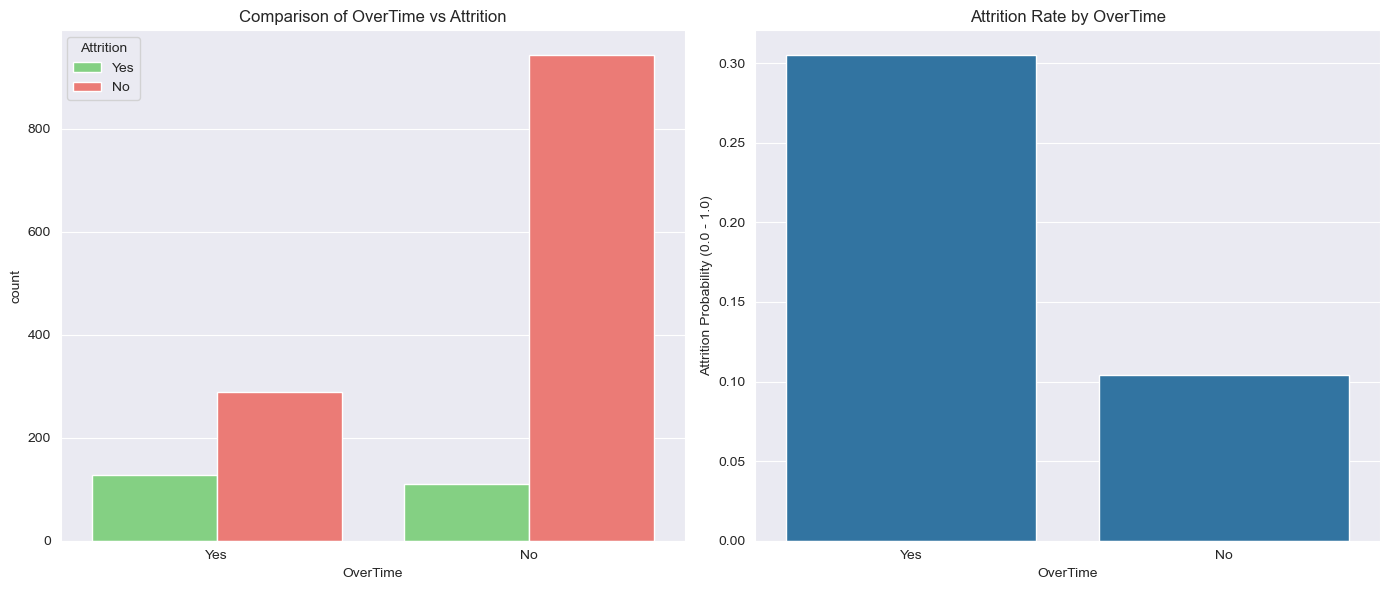

In [33]:

CategoricalVariables_targetPlots(df,"OverTime")

#### Business Travel

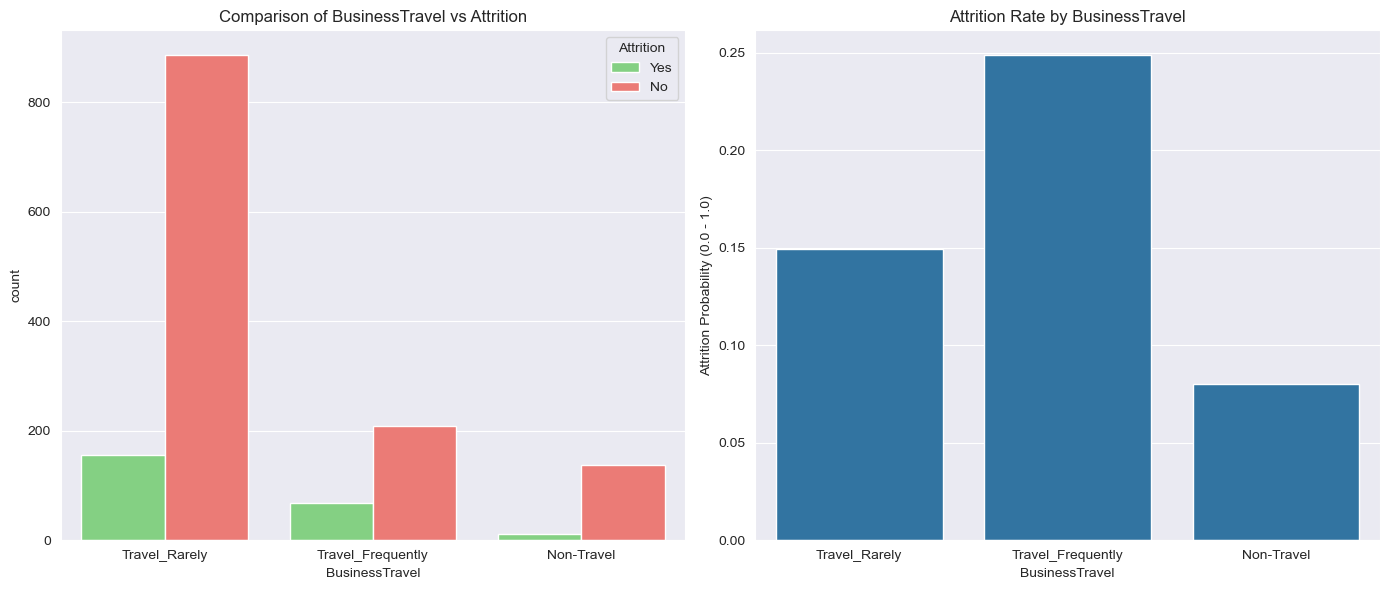

In [34]:
CategoricalVariables_targetPlots(df,segment_by="BusinessTravel")

#### Department

In [35]:
df.Department.value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

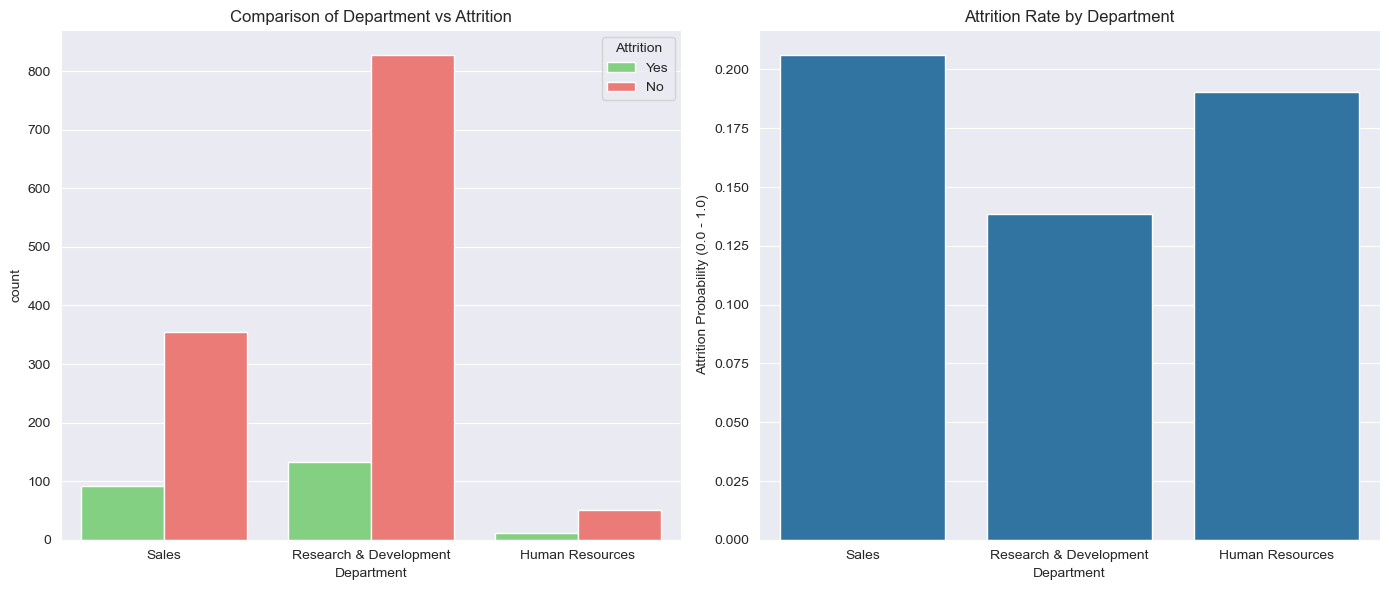

In [36]:
CategoricalVariables_targetPlots(df,segment_by="Department")

#### Education Field

In [37]:
df.EducationField.value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

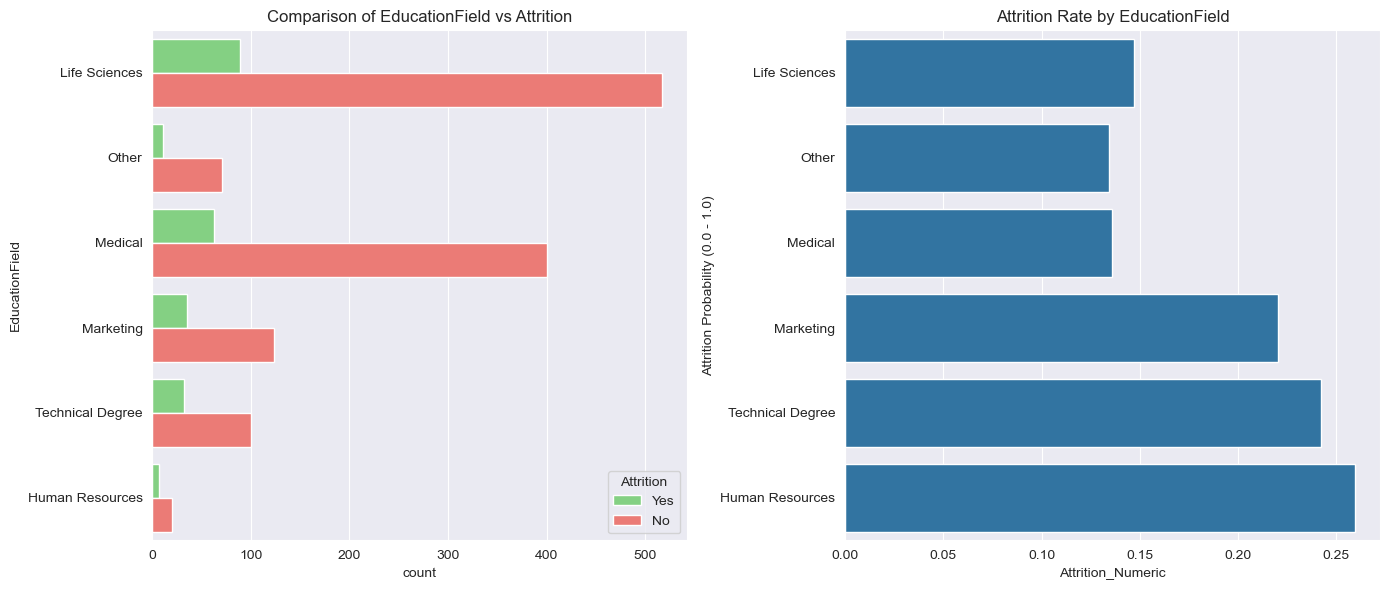

In [38]:
CategoricalVariables_targetPlots(df,"EducationField",invert_axis=True)

In [39]:
df.drop("EmployeeNumber",axis=1,inplace=True)
df.drop("Over18", axis=1, inplace=True)
df.drop("EmployeeCount", axis=1, inplace=True)
df.drop("StandardHours", axis=1, inplace=True)

In [40]:
df.drop("Attrition_Numeric", axis=1, inplace=True)

In [41]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

In [42]:
df['Attrition'].describe()

count    1470.000000
mean        0.161224
std         0.367863
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Attrition, dtype: float64

In [43]:
df['BusinessTravel'].replace('Travel_Rarely',1, inplace=True)
df['BusinessTravel'].replace('Travel_Frequently',3, inplace=True)
df['BusinessTravel'].replace('Non-Travel',2, inplace=True)

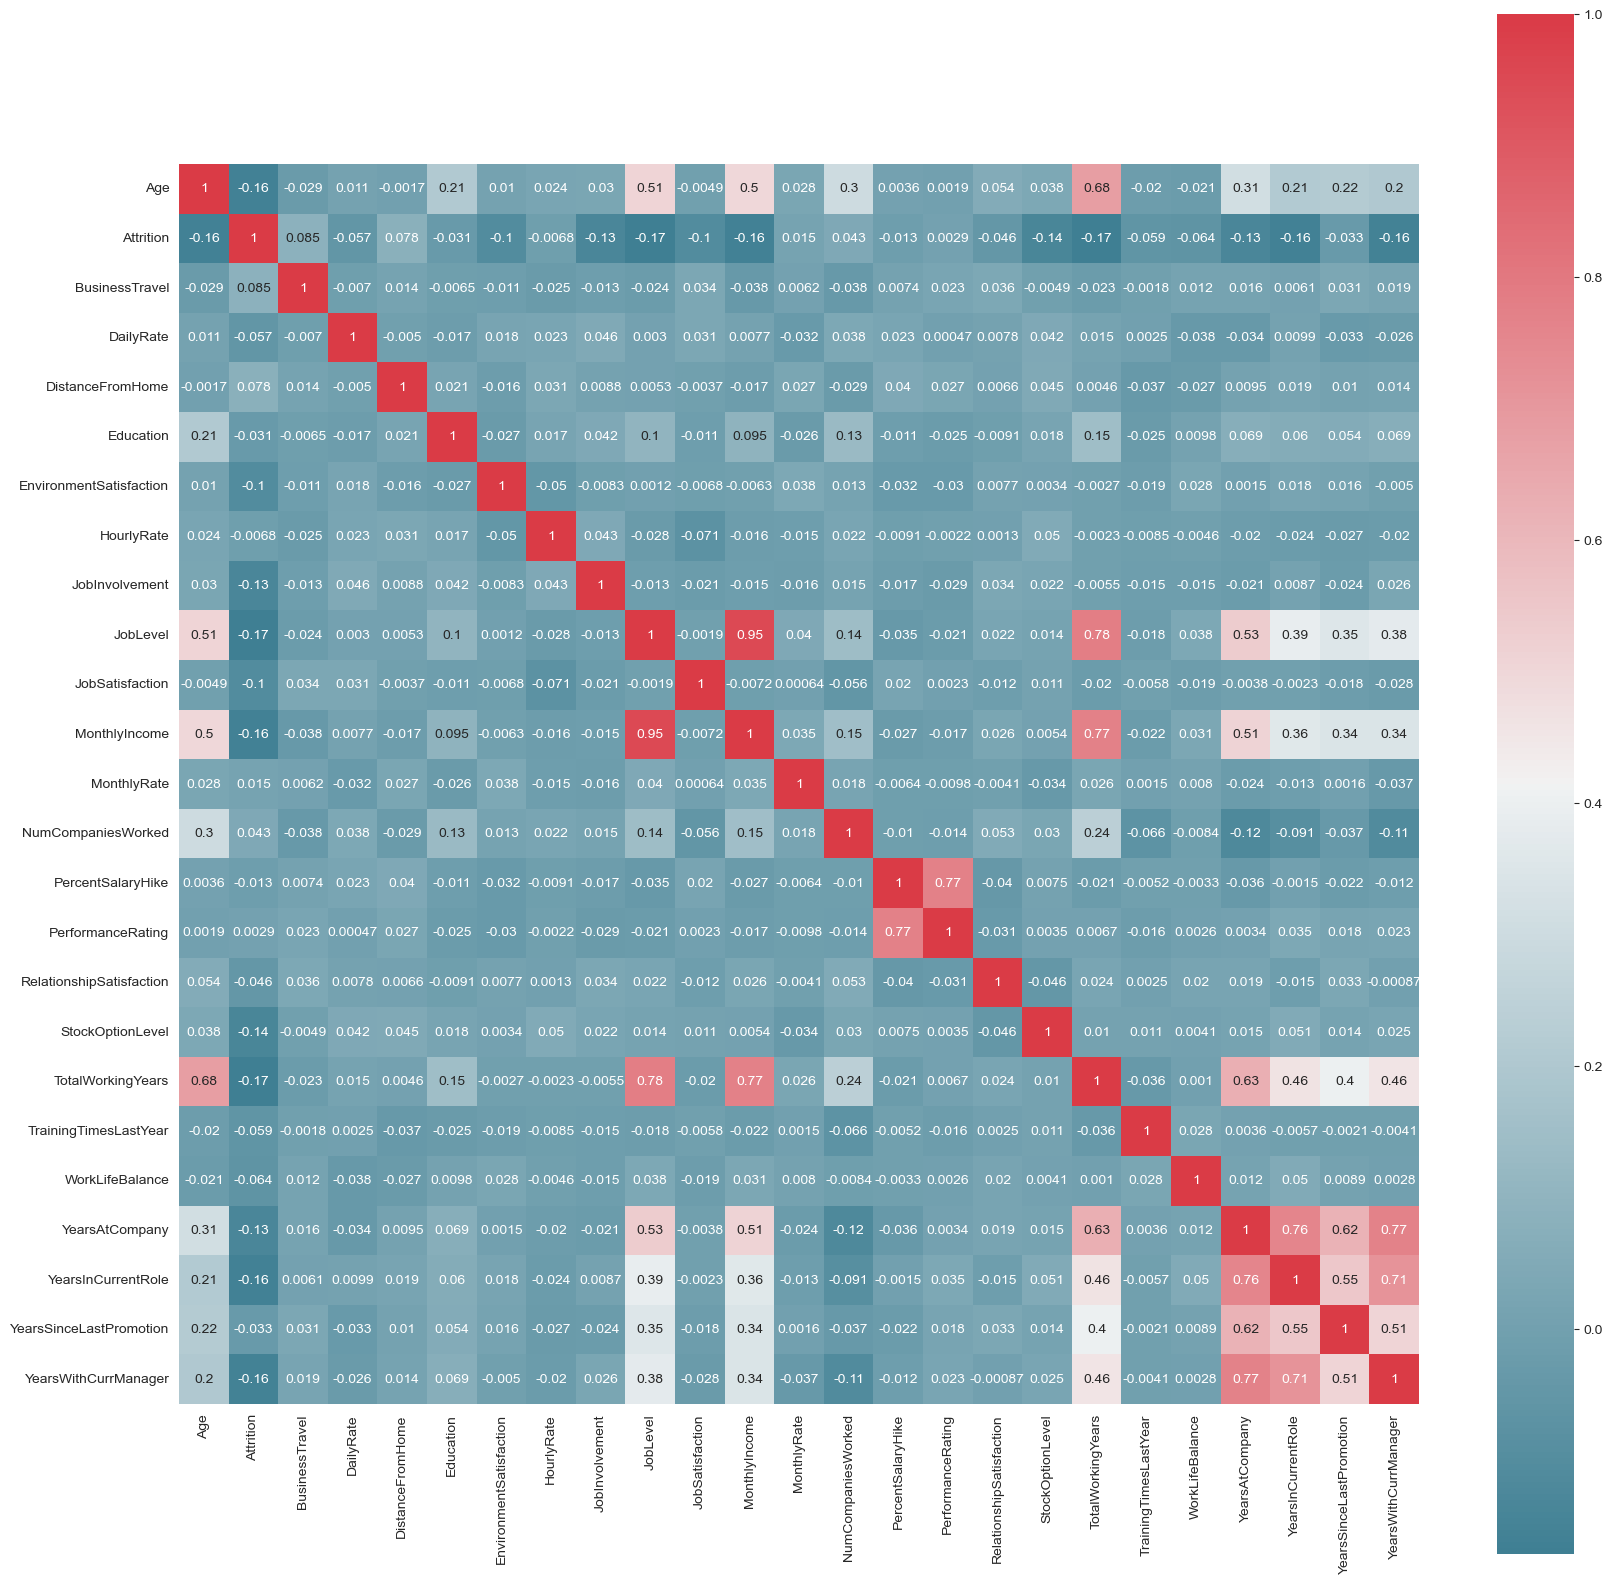

In [44]:

def employee_data_correlation_mat():
    corr_matrix = df.corr(numeric_only=True) 
    
    f, ax = plt.subplots(figsize=(20, 20))
    sns.heatmap(corr_matrix, 
                mask=np.zeros_like(corr_matrix, dtype=bool), 
                cmap=sns.diverging_palette(220, 10, as_cmap=True),
                square=True,
                ax=ax,
                annot=True)

employee_data_correlation_mat()
    

In [45]:
features_to_drop = [
    "DailyRate",
    "HourlyRate",
    "MonthlyRate",
    "PercentSalaryHike", 
    "YearsInCurrentRole",
    "YearsAtCompany",
    "YearsWithCurrManager",
    "TotalWorkingYears",
    "JobLevel"
]

for col in features_to_drop:
    df.drop(col, axis=1, inplace=True)

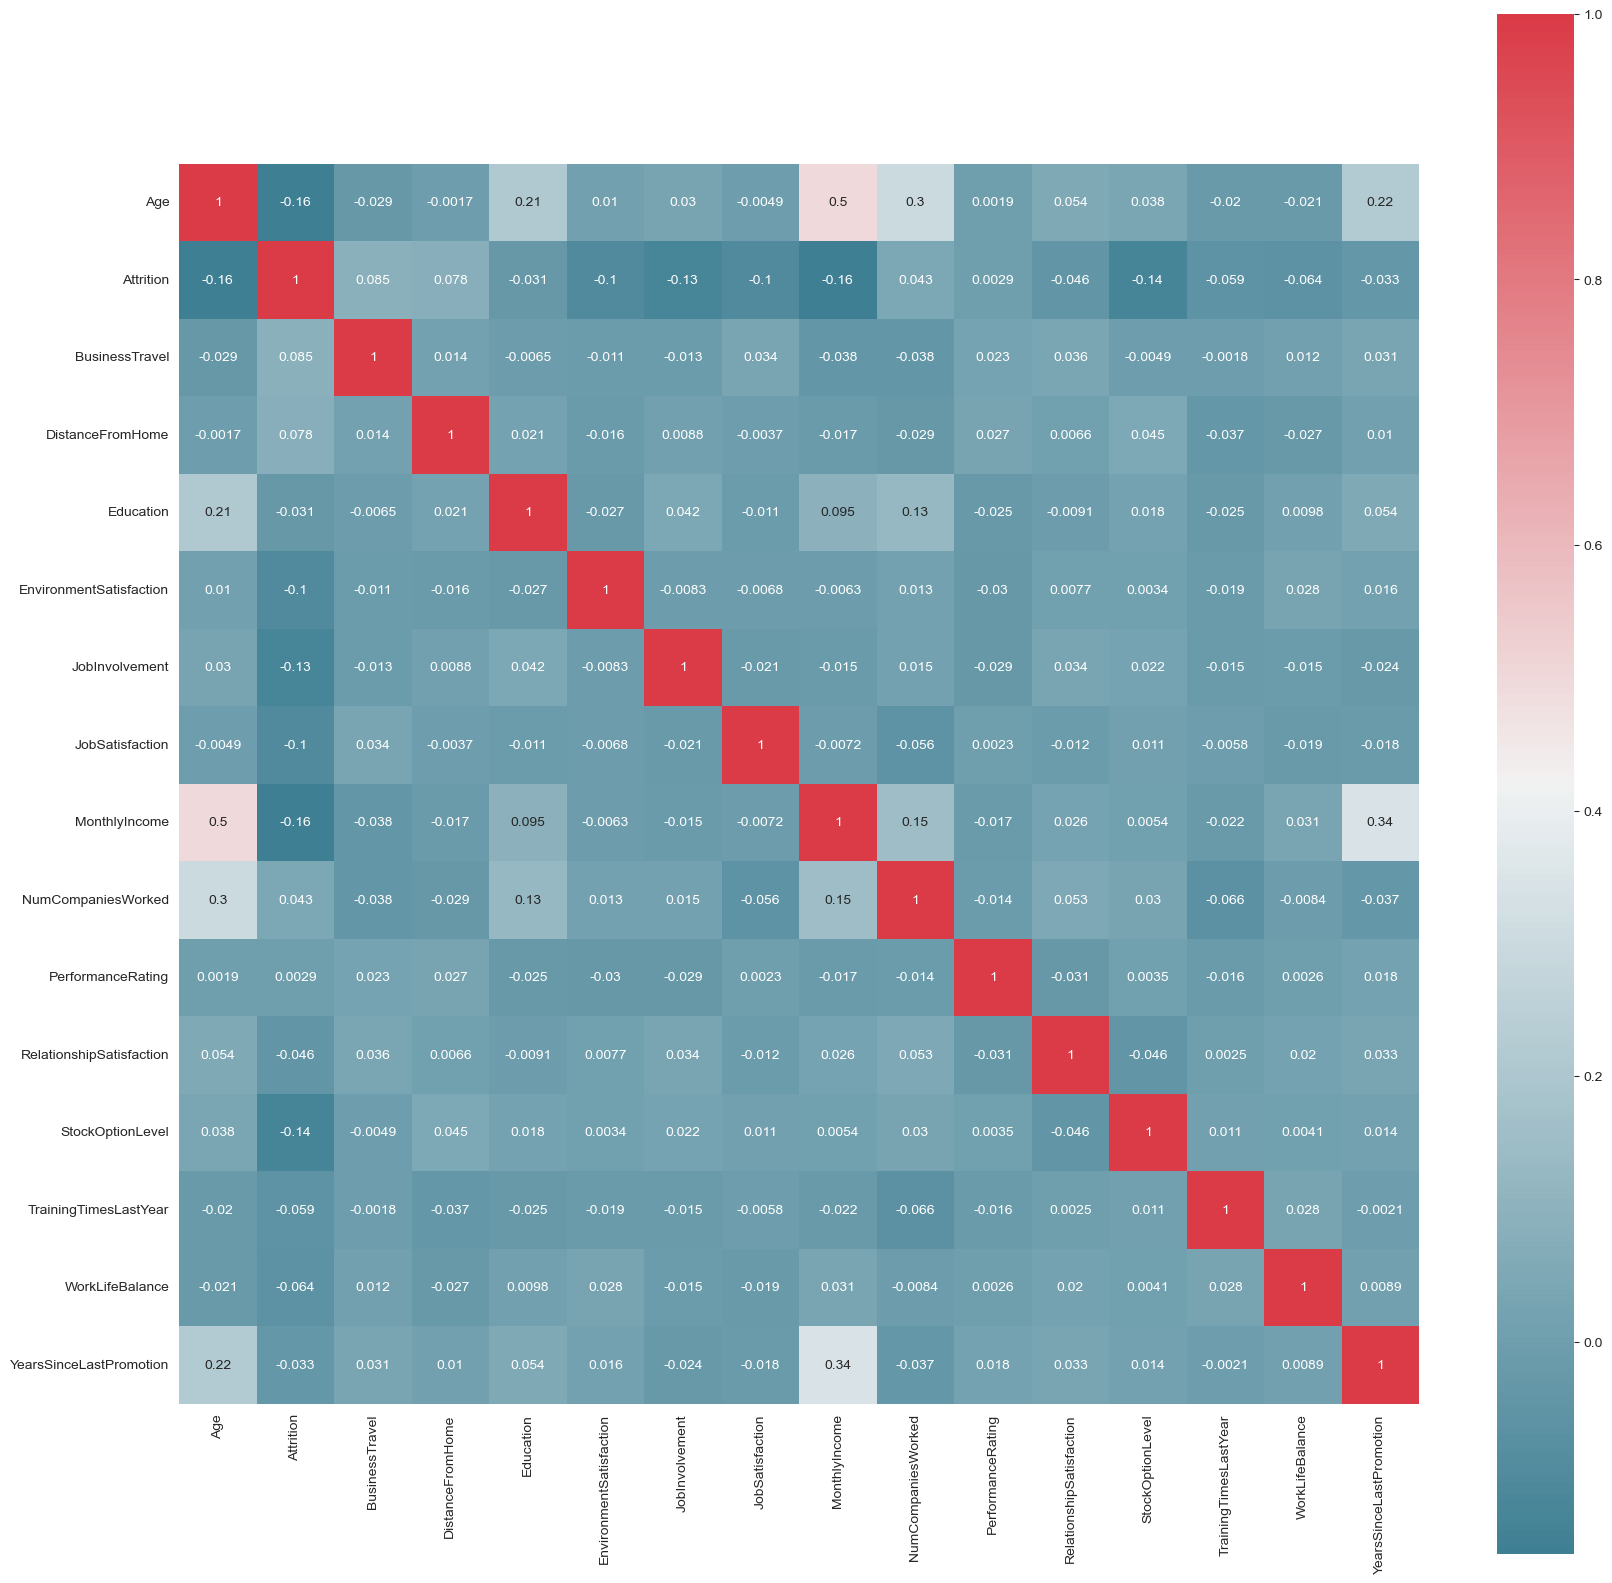

In [46]:
employee_data_correlation_mat()

In [47]:
from sklearn.preprocessing import LabelEncoder
def transform(feature):
    le=LabelEncoder()
    df[feature]=le.fit_transform(df[feature])
    print(le.classes_)

In [48]:
df_columns = df.columns
df_columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsSinceLastPromotion'],
      dtype='object')

In [49]:
df_object_columns = df.select_dtypes(include='object').columns
for col in df_object_columns:
    transform(col)

['Human Resources' 'Research & Development' 'Sales']
['Human Resources' 'Life Sciences' 'Marketing' 'Medical' 'Other'
 'Technical Degree']
['Female' 'Male']
['Healthcare Representative' 'Human Resources' 'Laboratory Technician'
 'Manager' 'Manufacturing Director' 'Research Director'
 'Research Scientist' 'Sales Executive' 'Sales Representative']
['Divorced' 'Married' 'Single']
['No' 'Yes']


In [50]:

df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion
0,41,1,1,2,1,2,1,2,0,3,...,2,5993,8,1,3,1,0,0,1,0
1,49,0,3,1,8,1,1,3,1,2,...,1,5130,1,0,4,4,1,3,3,1
2,37,1,1,1,2,2,4,4,1,2,...,2,2090,6,1,3,2,0,3,3,0
3,33,0,3,1,3,4,1,4,0,3,...,1,2909,1,1,3,3,0,3,3,3
4,27,0,1,1,2,1,3,1,1,3,...,1,3468,9,0,3,4,1,3,3,2


In [51]:
np.mean(df, axis=0)

Age                           36.923810
Attrition                      0.161224
BusinessTravel                 1.478912
Department                     1.260544
DistanceFromHome               9.192517
Education                      2.912925
EducationField                 2.247619
EnvironmentSatisfaction        2.721769
Gender                         0.600000
JobInvolvement                 2.729932
JobRole                        4.458503
JobSatisfaction                2.728571
MaritalStatus                  1.097279
MonthlyIncome               6502.931293
NumCompaniesWorked             2.693197
OverTime                       0.282993
PerformanceRating              3.153741
RelationshipSatisfaction       2.712245
StockOptionLevel               0.793878
TrainingTimesLastYear          2.799320
WorkLifeBalance                2.761224
YearsSinceLastPromotion        2.187755
dtype: float64

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   Department                1470 non-null   int32
 4   DistanceFromHome          1470 non-null   int64
 5   Education                 1470 non-null   int64
 6   EducationField            1470 non-null   int32
 7   EnvironmentSatisfaction   1470 non-null   int64
 8   Gender                    1470 non-null   int32
 9   JobInvolvement            1470 non-null   int64
 10  JobRole                   1470 non-null   int32
 11  JobSatisfaction           1470 non-null   int64
 12  MaritalStatus             1470 non-null   int32
 13  MonthlyIncome             1470 non-null   int64
 14  NumCompaniesWorked        1470 non-null 

### Outliers

In [53]:
cols_to_check = [
    'Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction',
    
]

# 2. Fungsi Cek Outlier
def check_outlier_impact(df, cols):
    # Pastikan hanya mengecek kolom yang benar-benar ada di df
    valid_cols = [c for c in cols if c in df.columns]
    
    print(f"{'Kolom':<15} | {'Outliers (Baris)':<18} | {'% Hilang':<10}")
    print("-" * 50)
    
    total_rows = len(df)
    total_outlier_indices = set() # Pakai set biar index unik (tidak double count)
    
    for col in valid_cols:
        # Hitung Q1 (25%) dan Q3 (75%)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Batas bawah dan atas (Standard Rule)
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Cari data yang di luar batas
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        num_outliers = len(outliers)
        pct_outliers = (num_outliers / total_rows) * 100
        
        # Simpan indexnya
        total_outlier_indices.update(outliers.index)
        
        print(f"{col:<15} | {num_outliers:<18} | {pct_outliers:.2f}%")

    print("-" * 50)
    print(f"Total baris unik yang akan terhapus: {len(total_outlier_indices)}")
    print(f"Persentase total data hilang: {(len(total_outlier_indices)/total_rows)*100:.2f}%")

# 3. Jalankan fungsi
check_outlier_impact(df, cols_to_check)

Kolom           | Outliers (Baris)   | % Hilang  
--------------------------------------------------
Age             | 0                  | 0.00%
BusinessTravel  | 0                  | 0.00%
Department      | 0                  | 0.00%
DistanceFromHome | 0                  | 0.00%
Education       | 0                  | 0.00%
EducationField  | 0                  | 0.00%
EnvironmentSatisfaction | 0                  | 0.00%
--------------------------------------------------
Total baris unik yang akan terhapus: 0
Persentase total data hilang: 0.00%


# Split

In [54]:
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

In [55]:
from sklearn.model_selection import train_test_split

np.random.seed(12345)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,stratify=y)

In [56]:

X_train.shape

(1249, 21)

In [58]:
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
skfold

StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

# Evaluation Metrics

In [59]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, mean_absolute_error, mean_squared_error, confusion_matrix
from sklearn import metrics

model_names = list()
accuracy_values = list()
precision_values = list()
recall_values = list()
f1_values = list()
roc_auc_values = list()

In [60]:
def evaluate_preds(model_name, clf, test_train_flag): 
    
    if test_train_flag: # test
        y_true = y_test
        s_time = time.time()
        y_preds = clf.predict(X_test)
        e_time = time.time()
        duration_calculator(model_name, s_time, e_time, 0)
    else: # train
        y_true = y_train
        s_time = time.time()
        y_preds = clf.predict(X_train)
        e_time = time.time()
        duration_calculator(model_name, s_time, e_time, 1)
    
    
    
    results = f'''
Model Name: {model_name}
Accuracy: {accuracy_score(y_true,y_preds)}
Precision: {precision_score(y_true,y_preds)}
Recall: {recall_score(y_true, y_preds)}
F1: {f1_score(y_true, y_preds)}
ROC AUC: {roc_auc_score(y_true, y_preds)}
    '''
    
    model_names.append(model_name)
    accuracy_values.append(accuracy_score(y_true,y_preds))
    precision_values.append(precision_score(y_true,y_preds))
    recall_values.append(recall_score(y_true, y_preds))
    f1_values.append(f1_score(y_true, y_preds))
    roc_auc_values.append(roc_auc_score(y_true, y_preds))
    
    return results

In [61]:

def conf_matrix(model_name, clf):
    y_true = y_test
    y_preds = clf.predict(X_test)
    
    print(model_name, "Confusion Matrix")
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true, y_preds), display_labels = [False, True])
    cm_display.plot()
    plt.show()

In [62]:
train_durations = list()
test_durations = list()

In [63]:

def duration_calculator(model_name, start_time, end_time, dtype):
    diff = end_time - start_time
    print(f"The Training Duration for {model_name} Model is {diff} seconds.")
    train_durations.append(diff) if dtype else test_durations.append(diff)

# Logisstic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

np.random.seed(12345)

clf = LogisticRegression()

grid = [
    {
        "C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
        "solver": ['liblinear', 'newton-cg','sag', 'saga', 'lbfgs'],
        "penalty": ['l2', 'l1','none', 'elasticnet'],
        "multi_class": ['auto', 'ovr', 'multinomial'],
        "max_iter": [100,250,500,750,1000]
    }
]

gs = GridSearchCV(
    estimator=clf,
    param_grid=grid,
    cv=skfold
)

gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=LogisticRegression(),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
                          'max_iter': [100, 250, 500, 750, 1000],
                          'multi_class': ['auto', 'ovr', 'multinomial'],
                          'penalty': ['l2', 'l1', 'none', 'elasticnet'],
                          'solver': ['liblinear', 'newton-cg', 'sag', 'saga',
                                     'lbfgs']}])

In [67]:
import time

In [68]:

start_time = time.time()
gs.best_estimator_.fit(X_train, y_train)
end_time = time.time()
print(f"It took {end_time - start_time} seconds to fit the train data")

It took 0.31427717208862305 seconds to fit the train data


In [69]:

gs.best_estimator_.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'newton-cg',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [70]:
gs.best_score_

0.8719164658634538

In [71]:
lg_optimized = gs.best_estimator_

In [72]:

print(evaluate_preds("Logistic Regression (Test)", gs.best_estimator_, 1))

The Training Duration for Logistic Regression (Test) Model is 0.010398149490356445 seconds.

Model Name: Logistic Regression (Test)
Accuracy: 0.8552036199095022
Precision: 0.625
Recall: 0.2777777777777778
F1: 0.38461538461538464
ROC AUC: 0.6226726726726726
    


Logistic Regression Confusion Matrix


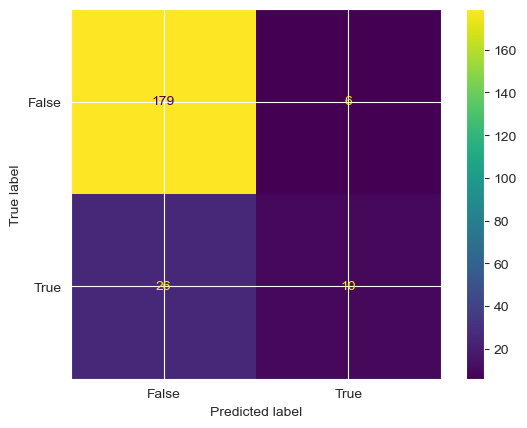

In [73]:
conf_matrix("Logistic Regression", gs.best_estimator_)